# COGS 118A- Project Checkpoint

# Names

- Dongze Li
- Feifan Li
- Rosy Xu
- Shaolong Li
- Zikang Chen

# Abstract 

Nowadays, heart disease can be regarded as one of the most fatal diseases in the world. And nearly 647,000 Americans die from heart disease every year. Thus, developing an ML model to detect and predict heart disease may help the patients get effective treatment at the early stage, significantly reducing the probability of causing death. To build the model, we decide to use a dataset that measures the possible indicators that cause heart disease like high blood pressure, alcohol, or smoking. By evaluating these indicators, we may be able to predict whether an individual has heart disease. CDC collects the data in the dataset through telephone surveys, including the health status of US adults in over 50 states. And before building the ML model, we will firstly preprocess the data, converting them into appropriate data types and abandoning some features if needed. After the model is created, we will use some metrics or criteria to evaluate its accuracy, determining whether it is a successful model.


# Background

Heart disease is one of the leading causes of death for all people from all racial and ethnic groups in the United States. According to the data from CDC, "one person dies every 36 seconds in the United States from cardiovascular disease<a name="CDC"></a>[<sup>[1]</sup>](#CDC) and about 659,000 people in the United States die from heart disease each year<a name="CDC"></a>[<sup>[1]</sup>](#CDC), which is 1 in every 4 deaths<a name="CDC"></a>[<sup>[1]</sup>](#CDC)". Besides, heart disease placed huge fiscal stress on the Federal government, “costing about 363 billion dollars each year from 2016 to 2017"<a name="CDC"></a>[<sup>[1]</sup>](#CDC).

Many prior works have been done in this area. One prior work done by Davide Chicco & Giuseppe Jurman<a name="BMC"></a>[<sup>[2]</sup>](#BMC) analyzed a dataset of 299 patients with heart failure and performed an alternative feature ranking analysis using traditional biostatistics tests. 

Another work done by Rohit Bharti, Aditya Khamparia and et al.<a name="Hindawi"></a>[<sup>[3]</sup>](#Hindawi) tried to predict Heart Disease using a combination of Machine Learning and Deep Learning. They used a Public Health Dataset containing 76 attributes and employed various methods including KNN, PCA and SVM to do the analysis. 

Using ML algorithms to do the Heart Disease Prediction can be really important because good prediction can help lower the risk of the disease and further prevent life threat. Even an inaccurate prediction can indirectly provide us with some meaningful data that shows relationship between the factors that contribute most to heart disease. Therefore, answering the question such as which factors contribute most to heart disease can be really necessary.


# Problem Statement

The data set contains around 20 variables, and each observation represents a person's health information. What we are trying to do is to create several machine learning models (SVM, logistic regression, decision trees, etc.) to predict whether a patient (using his/her health data) will potentially have heart disease or not. Where in the dataset, the “HeartDisease” binary variable - “Yes” and “No” - represents our predictive Y-values.

In detail, we are given an X matrix where each row represents a person’s health data, and a Y vector corresponding to the X matrix that determines whether that individual has heart disease or not. Our goal is to create a machine learning model on the training proportion (both X and Y) of the data so that when given some test data (X test matrix), the model can predict whether each person (one row in X) has heart disease or not.

We can also calculate the accuracy, f1 score, or other evaluation metrics for our model. Besides, our model should also work even when variables are missing or changed in some parts. Our goal is to create a model with high accuracy at predicting the heart disease. The ROC-AUC graph and learning curve grpah will also be analyzed.

# Data

- DataSet link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

- There are a total of 320k observations and 18 variables or features. Of these 18 variables, 9 of them are Booleans, 5 of them are string, and 4 of them are numeric.

- For a single observation, it includes a comprehensive set of information about an individual, which allows us to predict whether an individual has heart disease with high accuracy. The report consists of sex, age, smoking history, etc.

- In all of these features or variables, 3 of them are very critical in determining the accuracy and reliability of our machine learning model. To be specific, age can be regarded as an essential factor influencing the probability of having heart disease, and we use numeric values to represent it. Second, smoking history can be seen as another critical indicator of heart disease. Most patients with heart diseases have a long smoking history. In this dataset, we use Boolean values to represent this information.

- Moreover, BMI also plays an essential role in affecting the likelihood of getting heart disease. Many studies have shown the close relationship between them. And we use numeric values (float) to represent it in this dataset.

- For the variables (features) that are Boolean or String, we need to convert them into categorical variables using one-hot encoding. Specifically, for the features that only have two categories,like "yes" or "no", we repalce them with 1 and 0 with lable encoding. And for others, we use one-hot encoding. For the numeric variables, we apply some normalization to adjust them in the same scale, which will help improve the accuracy of our machine learning model. Also, we make some feature selections. Precisely, we can calculate the Pearson correlation coefficient for the variables and found that the feature "race" is the least related to the occurence of heart disease; hence, we decide to drop it. The feature selection can help to make our algorithm more efficient by reducing the number of features.


### Data Cleaning

In [56]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [58]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [59]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [60]:
sex_df = pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
sex_name = ["Female", "Male"]
sex_df.columns = sex_name
print(sex_df.shape)
sex_df.head()

(319795, 2)


,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [61]:
def one_hot_encode(x:np.ndarray):
    uni = np.unique(x)
    print(uni)
    result = np.zeros((len(x), len(uni)))
    for i in range(len(x)):
        for j in range(len(uni)):
            if x[i] == uni[j]:
                result[i][j] = 1;
                
    return result

In [62]:
race_arr = pd.DataFrame(df['Race']).to_numpy()
one_hot_race = one_hot_encode(race_arr)
race_df = pd.DataFrame(one_hot_race, columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
 'White'])
race_df.head()

['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']


,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
diabetic_arr = pd.DataFrame(df['Diabetic']).to_numpy()
one_hot_diabetic = one_hot_encode(diabetic_arr)
diabetic_df = pd.DataFrame(one_hot_diabetic, columns = ['Diabetic(No)', 'Diabetic(No, borderline diabetes)', 'Diabetic(Yes)', 'Diabetic(Yes, during pregnancy)'])
diabetic_df.head()

['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']


,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)"
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [64]:
gen_health_arr = pd.DataFrame(df['GenHealth']).to_numpy()
one_hot_gen_health = one_hot_encode(gen_health_arr)
gen_health_df = pd.DataFrame(one_hot_gen_health, columns = ['GenHealth(Excellent)', 'GenHealth(Fair)', 
                                                            'GenHealth(Good)', 'GenHealth(Poor)', 'GenHealth(Very good)'])
gen_health_df.head()

['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


,GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [65]:
df = df.drop(['Sex', 'Race', 'GenHealth', 'Diabetic', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Yes,No,No,No
2,No,Yes,No,No,No,Yes,Yes,No,No
3,No,No,No,No,No,No,No,No,Yes
4,No,No,No,No,Yes,Yes,No,No,No


In [66]:
df['Smoking'] = df['Smoking'].map(
                   {'Yes':1 ,'No':0})
df['HeartDisease'] = df['HeartDisease'].map(
                   {'Yes':1 ,'No':0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(
                   {'Yes':1 ,'No':0})
df['Stroke'] = df['Stroke'].map(
                   {'Yes':1 ,'No':0})
df['DiffWalking'] = df['DiffWalking'].map(
                   {'Yes':1 ,'No':0})
df['PhysicalActivity'] = df['PhysicalActivity'].map(
                   {'Yes':1 ,'No':0})
df['Asthma'] = df['Asthma'].map(
                   {'Yes':1 ,'No':0})
df['KidneyDisease'] = df['KidneyDisease'].map(
                   {'Yes':1 ,'No':0})
df['SkinCancer'] = df['SkinCancer'].map(
                   {'Yes':1 ,'No':0})
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0


In [67]:
df = pd.concat([df, sex_df], axis=1, join='inner')
df = pd.concat([df, race_df], axis=1, join='inner')
df = pd.concat([df, diabetic_df], axis=1, join='inner')
df = pd.concat([df, gen_health_df], axis=1, join='inner')
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Normalization

In [68]:
# read file
original_df = pd.read_csv('heart_2020_cleaned.csv')
original_df.shape

(319795, 18)

In [69]:
# take a look at the dataset
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [70]:
# age feature
original_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [71]:
#replace the range with the first number
original_df['AgeCategory'] = original_df['AgeCategory'].replace(['80 or older'],'80-')
original_df['AgeCategory'] = original_df['AgeCategory'].str.split('-').str[0].astype('float64')

In [72]:
# process numeric features: BMI, PhysicalHealth, MentalHealth, AgeCategory, SleepTime
numeric_features = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']
scaler = StandardScaler()
original_df[numeric_features] = scaler.fit_transform(original_df[numeric_features])

In [73]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,0.141621,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,1.525151,White,No,Yes,Very good,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,0.695033,White,Yes,Yes,Fair,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,1.248445,White,No,No,Good,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,-0.688497,White,No,Yes,Very good,0.628776,No,No,No


In [74]:
original_df = original_df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
                                'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [75]:
# combing dataframe
original_df = pd.concat([original_df, df], axis=1, join='inner')

In [76]:
result_df = original_df
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
pd.set_option('display.max_columns', None)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
result_df = result_df.drop(['Diabetic(No, borderline diabetes)', 'Diabetic(Yes, during pregnancy)'], axis=1)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),Diabetic(Yes),GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
result_df.isnull().sum()

BMI                               0
PhysicalHealth                    0
MentalHealth                      0
AgeCategory                       0
SleepTime                         0
HeartDisease                      0
Smoking                           0
AlcoholDrinking                   0
Stroke                            0
DiffWalking                       0
PhysicalActivity                  0
Asthma                            0
KidneyDisease                     0
SkinCancer                        0
Female                            0
Male                              0
American Indian/Alaskan Native    0
Asian                             0
Black                             0
Hispanic                          0
Other                             0
White                             0
Diabetic(No)                      0
Diabetic(Yes)                     0
GenHealth(Excellent)              0
GenHealth(Fair)                   0
GenHealth(Good)                   0
GenHealth(Poor)             

EDA

We first investigated the relationship between HeartDisease and AgeCategory

In [80]:
df = pd.read_csv('heart_2020_cleaned.csv')
age_heart = pd.DataFrame(df[['HeartDisease', 'AgeCategory']])
age_heart['HeartDisease'] = age_heart['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)
age_heart

,HeartDisease,AgeCategory
0,0,55-59
1,0,80 or older
2,0,65-69
3,0,75-79
4,0,40-44
...,...,...
319790,1,60-64
319791,0,35-39
319792,0,45-49
319793,0,25-29


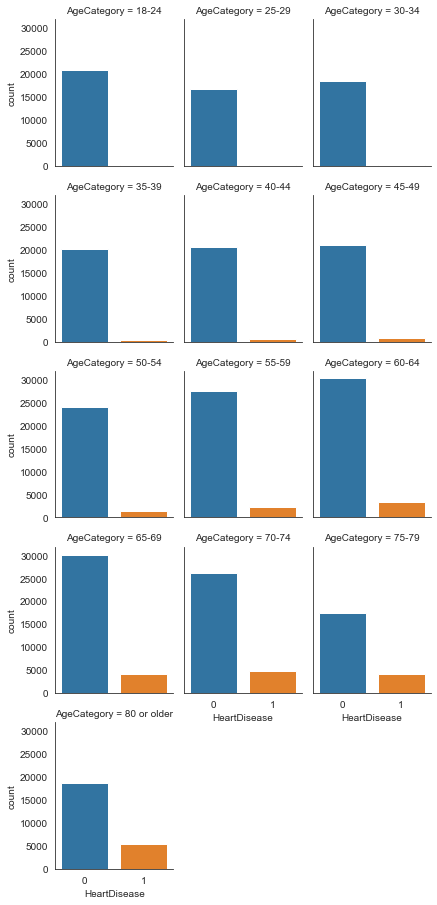

In [81]:
sns.catplot(x="HeartDisease", col="AgeCategory", col_order=[i for i,j in age_heart.groupby('AgeCategory')], data=age_heart, kind="count", col_wrap=3, height=2.5, aspect=.8,margin_titles=True)
plt.show()

Since different categories have different total number, we randomly choose 10000 people from each age category and draw the graph again.

In [82]:
random_10000_eachage = pd.DataFrame(columns = ['HeartDisease', 'AgeCategory'])
for i, j in age_heart.groupby('AgeCategory'):
    random_10000_eachage = pd.concat([j.sample(n = 10000, replace = False),random_10000_eachage])
random_10000_eachage.head()

,HeartDisease,AgeCategory
86854,0,80 or older
137126,0,80 or older
74698,0,80 or older
292628,0,80 or older
83521,0,80 or older


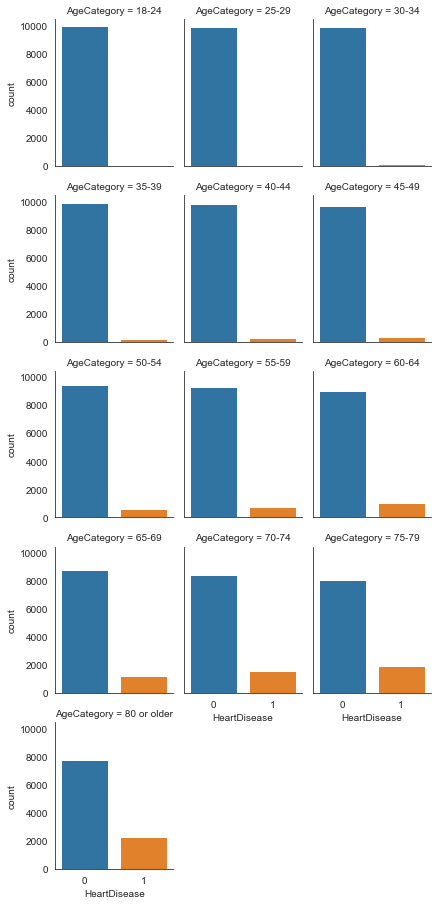

In [83]:
sns.catplot(x="HeartDisease", col="AgeCategory", col_order=[i for i,j in age_heart.groupby('AgeCategory')], data=random_10000_eachage, kind="count", col_wrap=3, height=2.5, aspect=.8, margin_titles=True)
plt.show()

From the graph, we could see that when age is higher, there are more people have heart disease.

Investigate percentage of each age category who have heartdisease using pie chart.

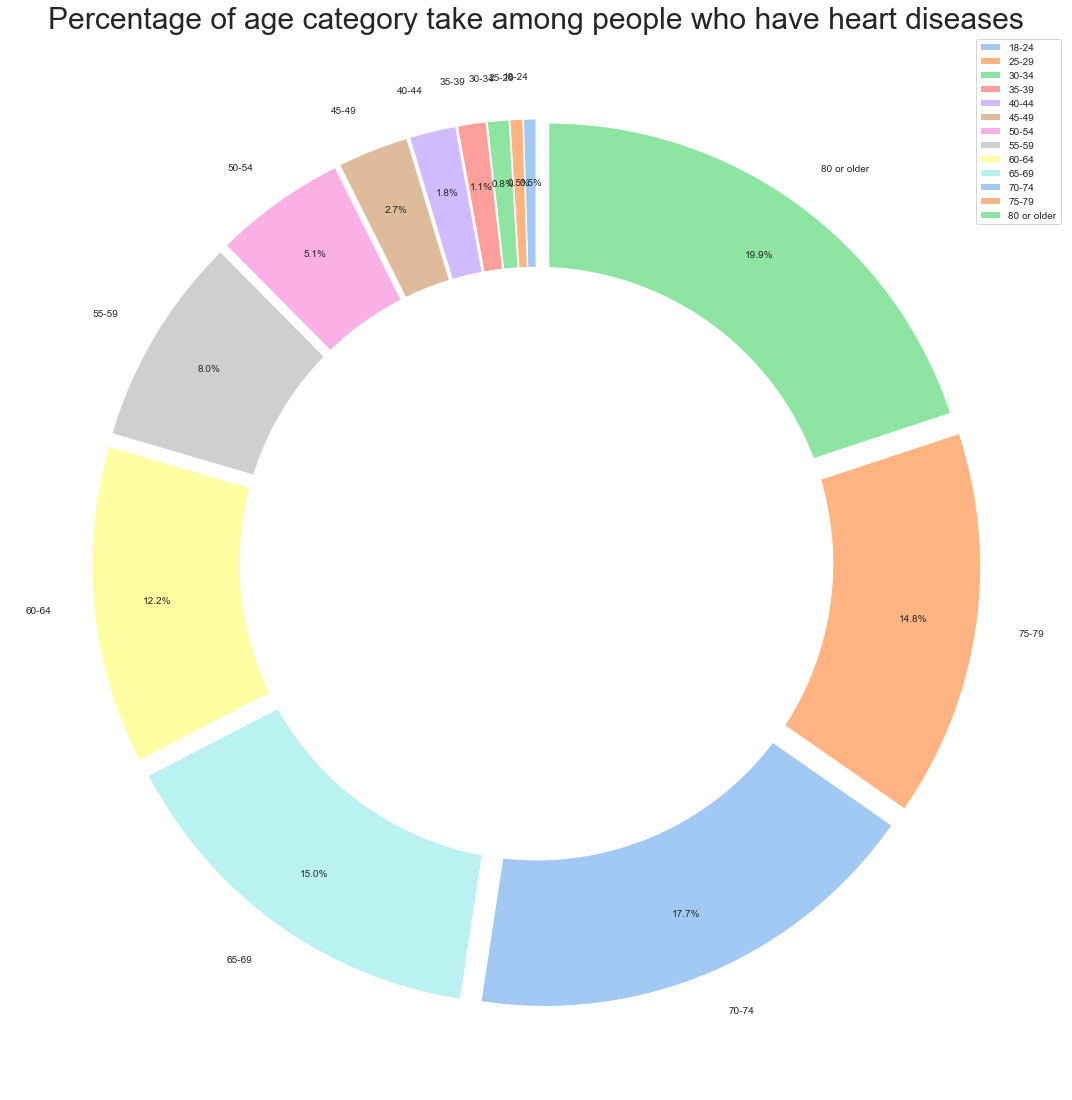

In [84]:
label = []
count = []
for i, j in age_heart.groupby('AgeCategory'):
    label.append(i)
    count.append(sum(j['HeartDisease']))
fig = plt.figure(figsize=(15, 15))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(count, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Percentage of age category take among people who have heart diseases",fontsize=30)
plt.show()

From the graph, it seems that older people are more likely to be recorded as having heart disease.

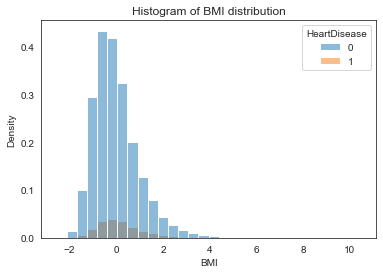

In [85]:
sns.histplot(data=result_df, x="BMI", hue="HeartDisease", bins=30, stat="density").set(title='Histogram of BMI distribution')
plt.show()

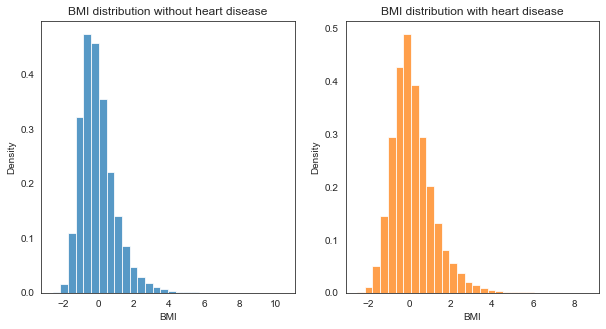

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="BMI", bins=30, stat="density").set(title='BMI distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="BMI", bins=30, stat="density", color = sns.color_palette()[1]).set(title='BMI distribution with heart disease')
plt.show()

It seems that people with heart disease and people without heart disease have similar distribution of BMI.

Investigate the Physicalhealth, mentalhealth on heart disease.

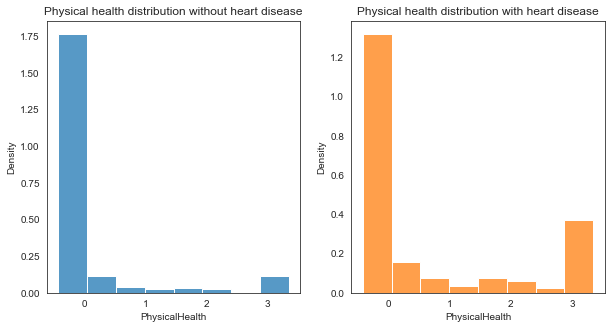

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="PhysicalHealth", bins=8, stat="density").set(title='Physical health distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="PhysicalHealth", bins=8, stat="density", color = sns.color_palette()[1]).set(title='Physical health distribution with heart disease')
plt.show()

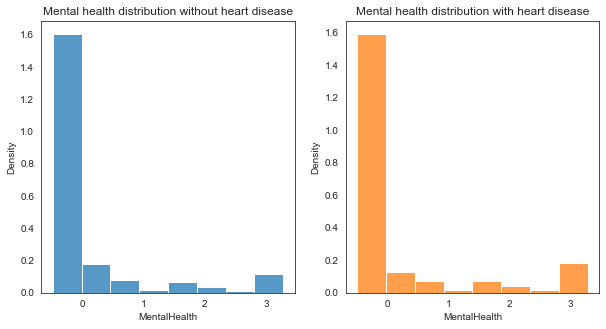

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="MentalHealth", bins=8, stat="density").set(title='Mental health distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="MentalHealth", bins=8, stat="density", color = sns.color_palette()[1]).set(title='Mental health distribution with heart disease')
plt.show()

From above graphs, people with/without heart disease have a similar distribution on mental and physical health, the only difference is that there is larger proportion of high physical health component in people with heart disease.

Investigate the relationship between sleeptime and positivity of heart disease.

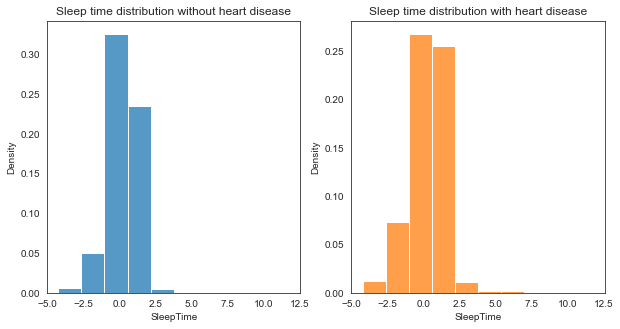

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="SleepTime", bins=10, stat="density").set(title='Sleep time distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="SleepTime", bins=10, stat="density", color = sns.color_palette()[1]).set(title='Sleep time distribution with heart disease')
plt.show()

From the above graphs, there is a higher proportion of people sleep 0 hours (after standardization) for people who do not have heart disease. There is a lower proportion of people sleep more than 2.5 hours (after standardization) for people who do not have heart disease.

Investigate the relationship between bad habits and positivity of heart disease.

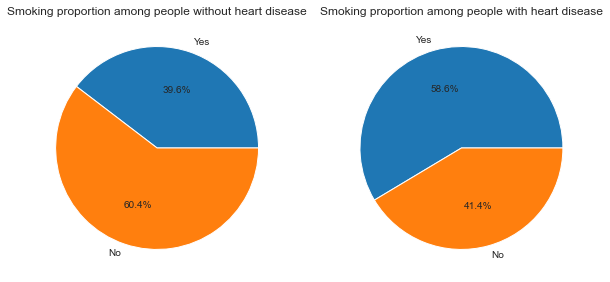

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['Smoking'].sum(), len(negative_heartdisease['Smoking']) - negative_heartdisease['Smoking'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Smoking proportion among people without heart disease')
axes[1].pie([positive_heartdisease['Smoking'].sum(), len(positive_heartdisease['Smoking']) - positive_heartdisease['Smoking'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Smoking proportion among people with heart disease')
plt.show()

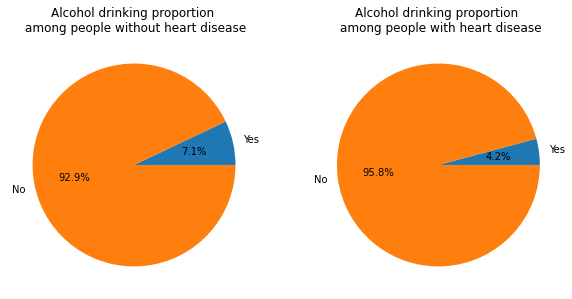

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['AlcoholDrinking'].sum(), len(negative_heartdisease['AlcoholDrinking']) - negative_heartdisease['AlcoholDrinking'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Alcohol drinking proportion \n among people without heart disease')
axes[1].pie([positive_heartdisease['AlcoholDrinking'].sum(), len(positive_heartdisease['AlcoholDrinking']) - positive_heartdisease['AlcoholDrinking'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Alcohol drinking proportion \n among people with heart disease')
plt.show()

Among people who do not have heart disease, there are less proportion smoking and more proportion drinking alcohol, compared with people who have heart disease.

Investigate the relationship between physical activity, difficulty walking and positivity of heart disease.

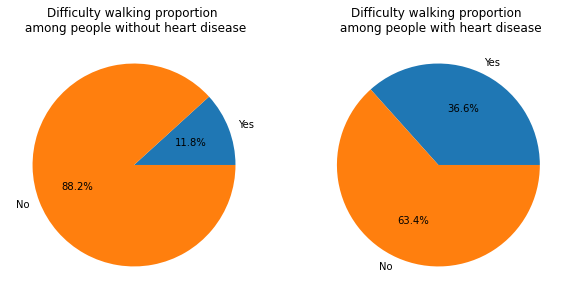

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['DiffWalking'].sum(), len(negative_heartdisease['DiffWalking']) - negative_heartdisease['DiffWalking'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Difficulty walking proportion \n among people without heart disease')
axes[1].pie([positive_heartdisease['DiffWalking'].sum(), len(positive_heartdisease['DiffWalking']) - positive_heartdisease['DiffWalking'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Difficulty walking proportion \n among people with heart disease')
plt.show()

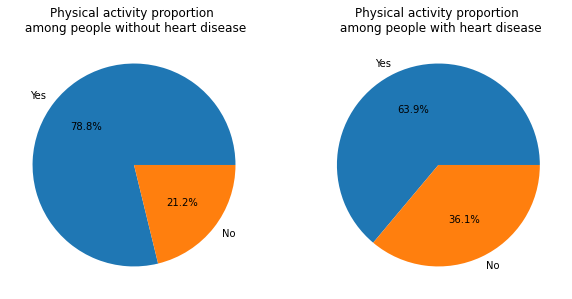

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['PhysicalActivity'].sum(), len(negative_heartdisease['PhysicalActivity']) - negative_heartdisease['PhysicalActivity'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Physical activity proportion \n among people without heart disease')
axes[1].pie([positive_heartdisease['PhysicalActivity'].sum(), len(positive_heartdisease['PhysicalActivity']) - positive_heartdisease['PhysicalActivity'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Physical activity proportion \n among people with heart disease')
plt.show()

In general, there are more people having difficulty walking, and had no physical activity during last 30 days among people who have heart disease, compared with people who have no heart disease.

Investigate the relationship between fundamental diseases and heart disease.

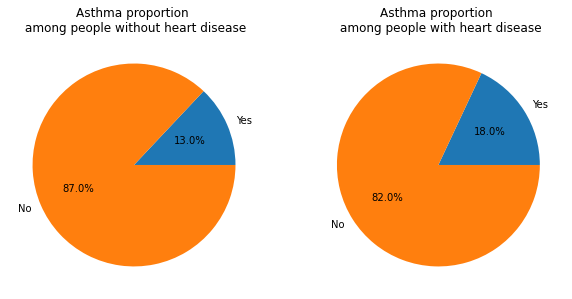

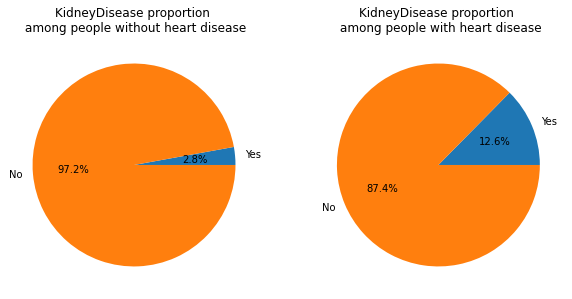

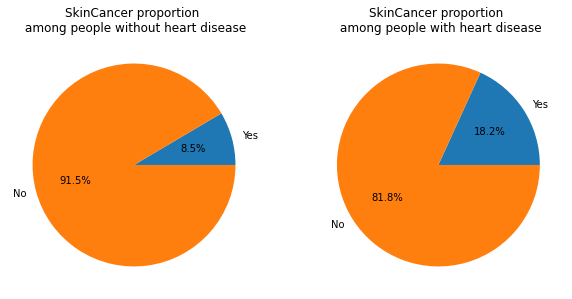

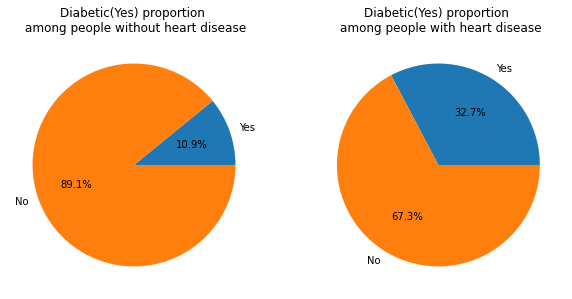

In [39]:
for i in ['Asthma','KidneyDisease','SkinCancer','Diabetic(Yes)']:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    label = ['Yes', 'No']
    negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
    positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
    axes[0].pie([negative_heartdisease[i].sum(), len(negative_heartdisease[i]) - negative_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[0].set_title(i + ' proportion \n among people without heart disease')
    axes[1].pie([positive_heartdisease[i].sum(), len(positive_heartdisease[i]) - positive_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[1].set_title(i + ' proportion \n among people with heart disease')
    plt.show()

Clearly from the above graphs, there is a higher proportion of having fundamental diseases among people who have heart disease, compared with people who do not have heart disease.

Investigate the relationship between gender and heart disease.

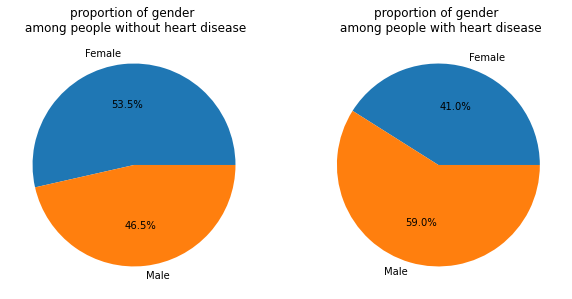

In [40]:
for i in ['Female']:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    label = ['Female', 'Male']
    negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
    positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
    axes[0].pie([negative_heartdisease[i].sum(), len(negative_heartdisease[i]) - negative_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[0].set_title('proportion of gender \n among people without heart disease')
    axes[1].pie([positive_heartdisease[i].sum(), len(positive_heartdisease[i]) - positive_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[1].set_title('proportion of gender \n among people with heart disease')
    plt.show()

From the grpah, female has a higher proportion in the people without heart disease.

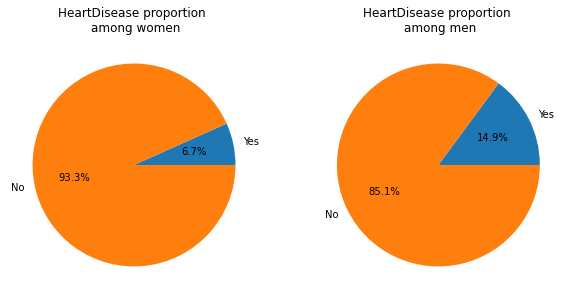

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
positive_female = result_df[result_df['Female'] == 1]
positive_male = result_df[result_df['Male'] == 0]
axes[0].pie([positive_female['HeartDisease'].sum(), len(positive_female['HeartDisease']) - positive_female['HeartDisease'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('HeartDisease' + ' proportion \n among women')
axes[1].pie([positive_heartdisease['HeartDisease'].sum(), len(positive_male['HeartDisease']) - positive_male['HeartDisease'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('HeartDisease' + ' proportion \n among men')
plt.show()

From the graph, more proportion of men have heart disease compared with women.

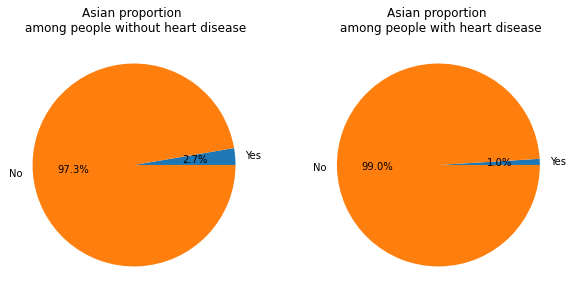

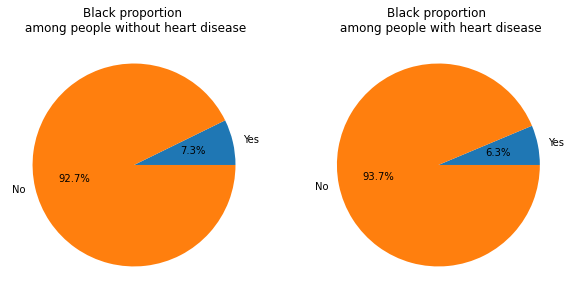

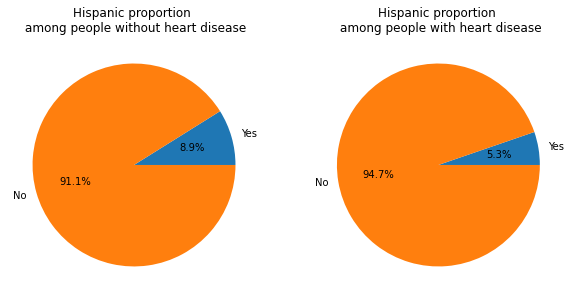

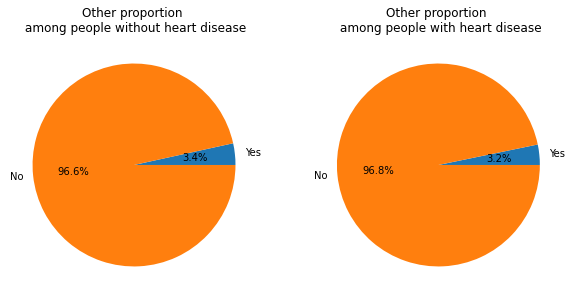

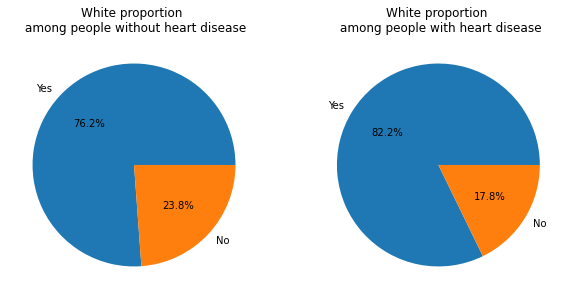

In [42]:
for i in ['Asian','Black','Hispanic', 'Other', 'White']:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    label = ['Yes', 'No']
    negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
    positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
    axes[0].pie([negative_heartdisease[i].sum(), len(negative_heartdisease[i]) - negative_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[0].set_title(i + ' proportion \n among people without heart disease')
    axes[1].pie([positive_heartdisease[i].sum(), len(positive_heartdisease[i]) - positive_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[1].set_title(i + ' proportion \n among people with heart disease')
    plt.show()

From above graphs, the distribution of gender seems to be the same among people who have heart disease and people who do not have heart disease.

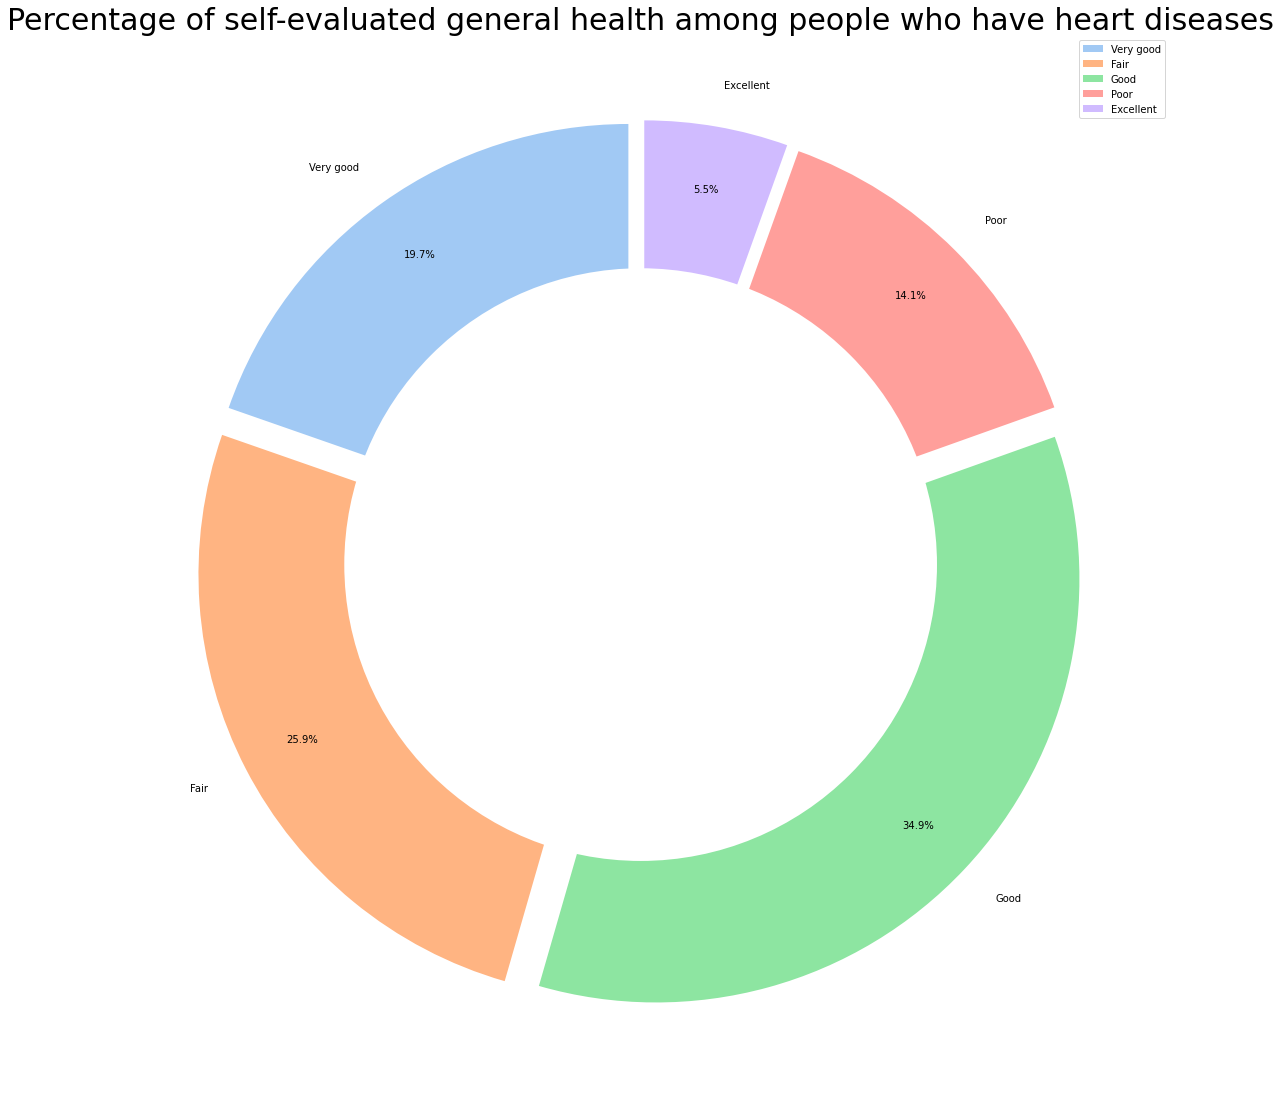

In [43]:
counts = []
label = []
for i in df['GenHealth'].unique():
    counts.append((df[df['HeartDisease'] == 'Yes']['GenHealth'] == i).sum())
    label.append(i)
fig = plt.figure(figsize=(15, 15))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(counts, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Percentage of self-evaluated general health among people who have heart diseases",fontsize=30)
plt.show()

Among those who have heart disease, fewer of them evaluate their health condition as "very good", and most of them evaluate themselves as "fair" and "good".

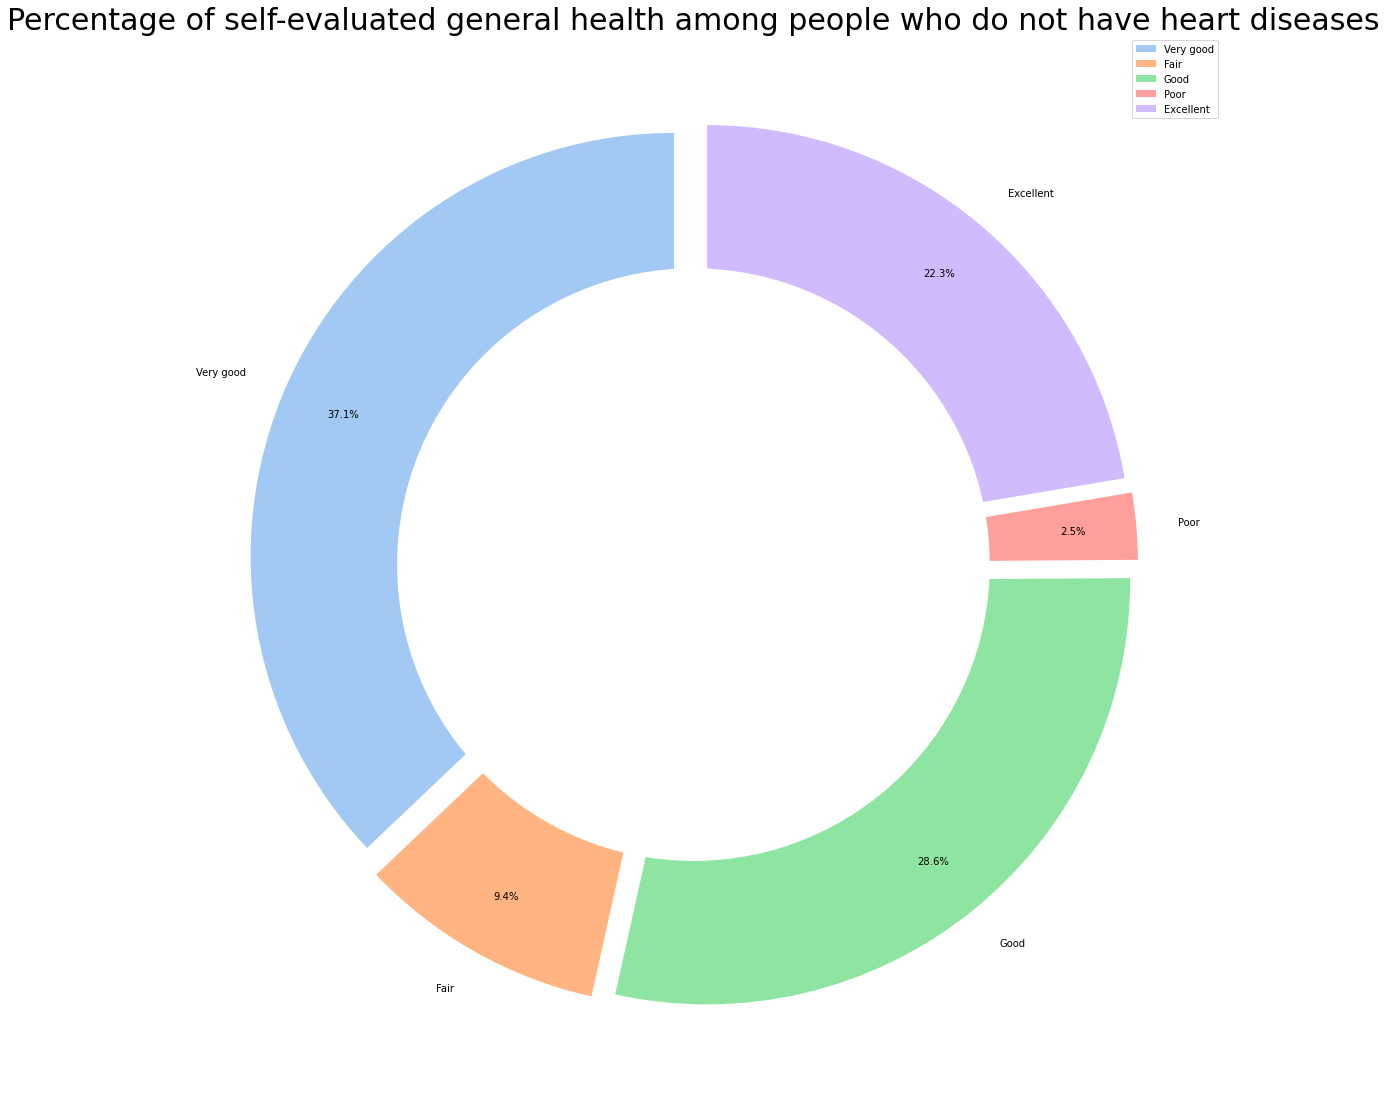

In [44]:
counts = []
label = []
for i in df['GenHealth'].unique():
    counts.append((df[df['HeartDisease'] == 'No']['GenHealth'] == i).sum())
    label.append(i)
fig = plt.figure(figsize=(15, 15))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(counts, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Percentage of self-evaluated general health among people who do not have heart diseases",fontsize=30)
plt.show()

Among those who do not have heart diseases, more proportion of them mark themselves as "very good" and "excellent".

# Proposed Solution

Dataset will be seperated into three big chunch where each chunk is about 10,000 data with 24 features. This is a large Nested Cross Validation so that the inner loop will be hyperparameter selection for each model, and the outer loop will be choosing the best model, or make a comparison with different models.

### Solution 1 - Logistic Regression

We will be using CV and Gridsearch to find the best parameters for sklearn LogisticRegression, and do analysis on different metrics (accuracy, f1, etc) with some graphs. Due to its generalization performance and fast speed, this model will be used as the baseline model for our dataset.

### Solution 2 - Decision Tree

We will be using CV and Gridsearch to find the best parameters for sklearn DecisionTree, and do analysis on different metrics (accuracy, f1, etc) with some graphs. Trainning curve will also be graphed in the solution.

### Solution 3 - SVM

We will be using CV and Gridsearch to find the best parameters for CUML Supported Vector Machine, and do analysis on its test sore report (accuracy, f1, etc) with some graphs. Also, PCA will be done on the train and test X data so that some noise will be cancel.

### Common Package (not exact name listed)

sklearn: logistic regression, decision tree, f1 score, accuracy score, test report, roc and acu, standard scaler, gridsearch, cross validation, etc.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



<AxesSubplot:>

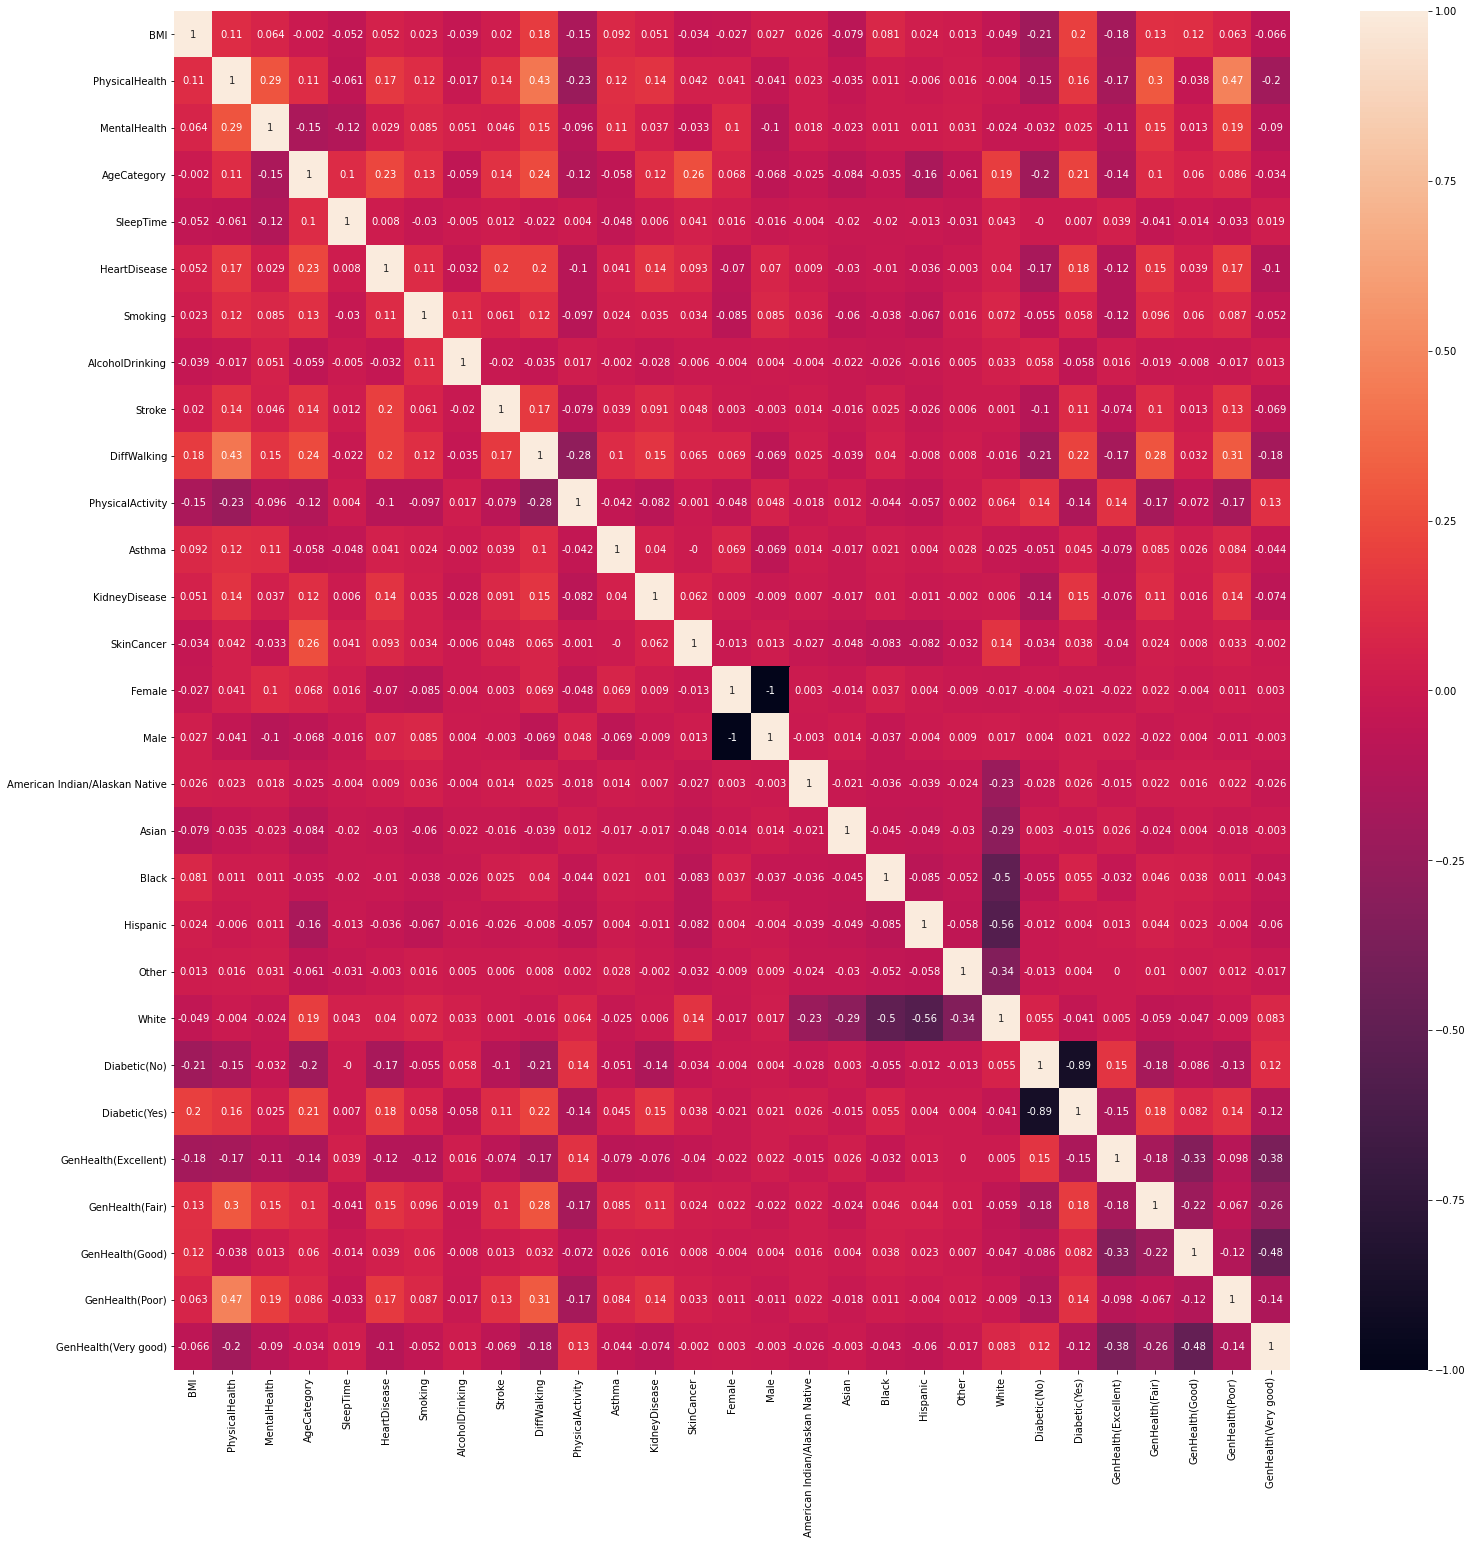

In [45]:
# correlation plot
correlation = result_df.corr().round(3)
plt.figure(figsize = (25,25))
sns.heatmap(correlation, annot = True, cmap = 'rocket')

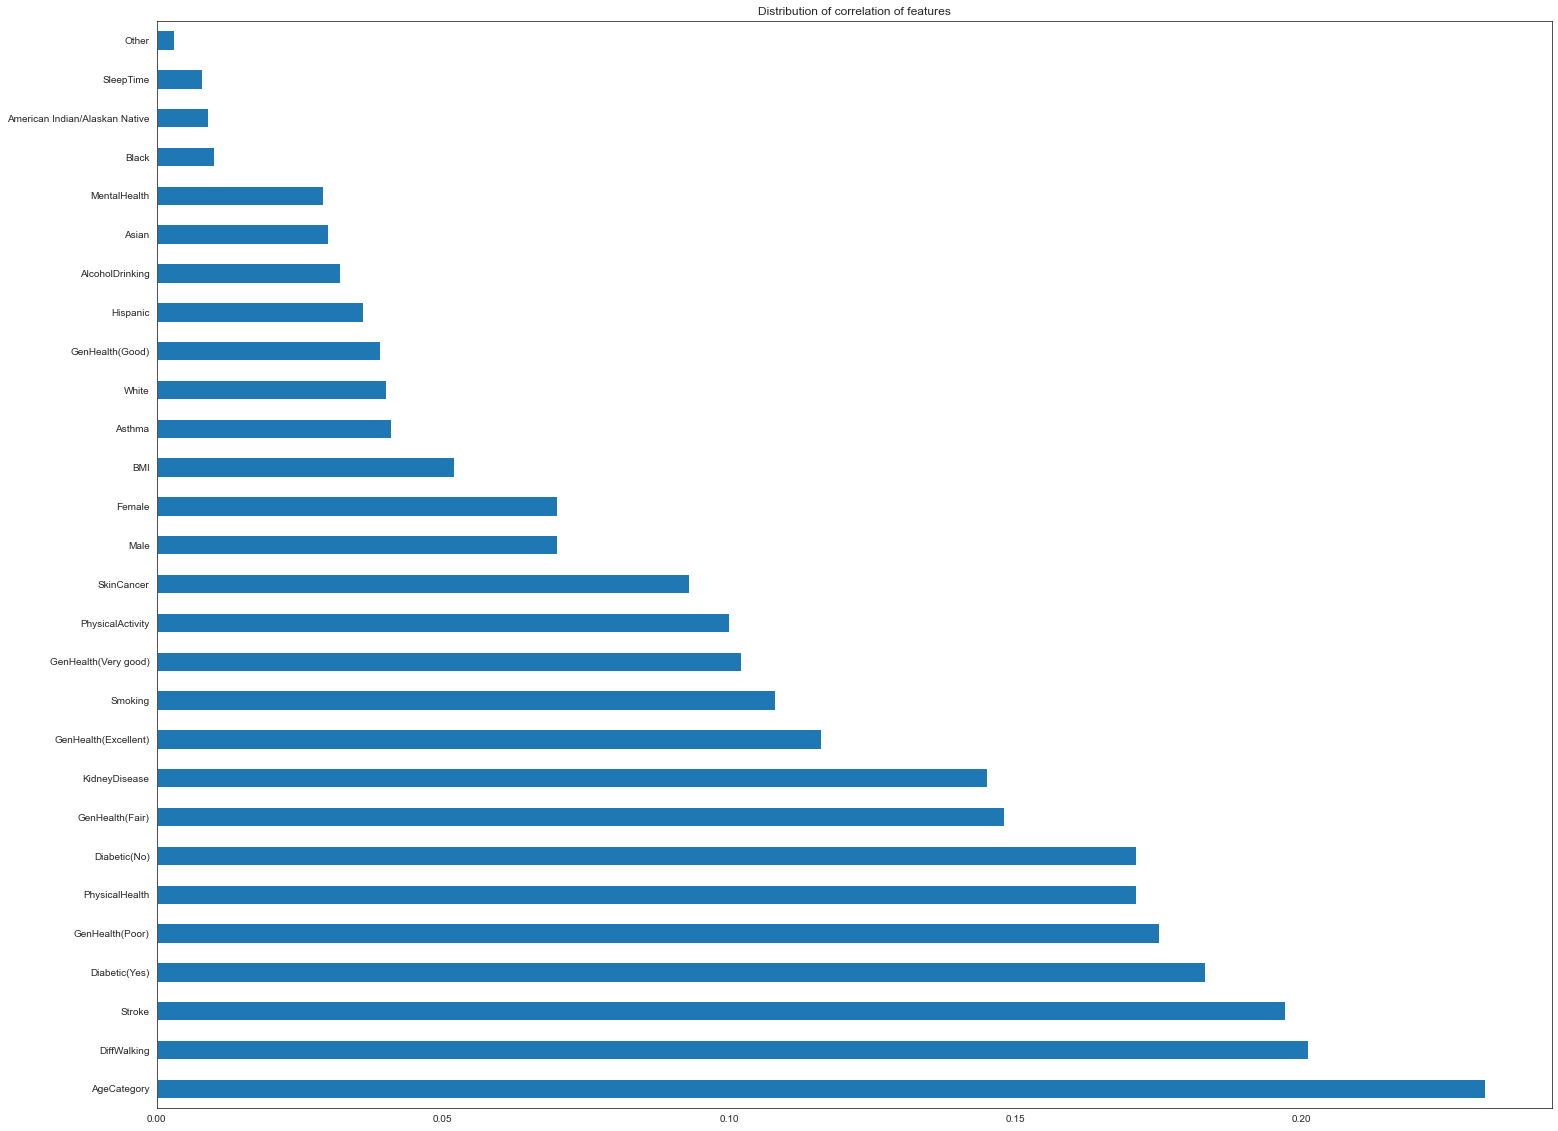

,HeartDisease
AgeCategory,0.232
DiffWalking,0.201
Stroke,0.197
Diabetic(Yes),0.183
GenHealth(Poor),0.175
PhysicalHealth,0.171
Diabetic(No),0.171
GenHealth(Fair),0.148
KidneyDisease,0.145
GenHealth(Excellent),0.116


In [46]:
#calculate the correlation coefficient
corr_result = pd.DataFrame(correlation.loc["HeartDisease"])
corr_result = abs(corr_result.drop(["HeartDisease"]))
corr_result = corr_result.sort_values("HeartDisease", ascending = False)
sns.set_style('white')
sns.set_palette('tab10')
plt.figure(figsize = (25,20))
plt.title('Distribution of correlation of features')
abs(corr_result['HeartDisease']).plot.barh()
plt.show()
corr_result

In [47]:
#drop features that are not important
result_df = result_df.drop(['Asian','Black','White','Hispanic','American Indian/Alaskan Native'], axis=1)

In [48]:
#split dataset into three parts
split_data = []
for i in range(3):
    split_data.append(result_df.sample(result_df.shape[0]//3, replace = False, random_state = 42))

First Dataset: SVM

Second Dataset: Decision Tree

Third Dataset: Logistic Regression

### Decision Tree

In [49]:
split_data[1].dtypes

BMI                     float64
PhysicalHealth          float64
MentalHealth            float64
AgeCategory             float64
SleepTime               float64
HeartDisease              int64
Smoking                   int64
AlcoholDrinking           int64
Stroke                    int64
DiffWalking               int64
PhysicalActivity          int64
Asthma                    int64
KidneyDisease             int64
SkinCancer                int64
Female                  float64
Male                    float64
Other                   float64
Diabetic(No)            float64
Diabetic(Yes)           float64
GenHealth(Excellent)    float64
GenHealth(Fair)         float64
GenHealth(Good)         float64
GenHealth(Poor)         float64
GenHealth(Very good)    float64
dtype: object

In [50]:
## data split
X = split_data[1].drop(["HeartDisease"], axis=1)
y = split_data[1]["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [51]:
%%time
#default decision tree model
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)

Wall time: 261 ms


DecisionTreeClassifier(random_state=42)

In [52]:
#metrics for default decision tree
train_score = decision_tree.score(X_train, y_train)
test_score = decision_tree.score(X_test,y_test)

y_pred = decision_tree.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred,))
print("Train_score:", train_score)
print("Test_score", test_score)

F1 score: 0.24605103280680438
Train_score: 0.9987194821642159
Test_score 0.8602988771001604


### Parameter Search for decision tree

In [96]:
#class weight
weight = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
search_space = {"criterion":["gini", "entropy"], "max_depth":[2,4,6,8,10,12,14,16,18,20],
                'max_features':['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.01, 0.03,0.09,0.1], 
                "min_samples_leaf": [1,3,5,7,9,11,13,15,17,19], 'class_weight': weight}

In [97]:
# use Stratified Kfold
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [35]:
#grid search
decision_tree_model = DecisionTreeClassifier(random_state = 1024)
f1_scorer = make_scorer(f1_score, pos_label=1)
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=search_space, cv=skf, verbose = True , n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1024), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.03, 0.09, 0.1],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              19]},
             verbose=True)

In [36]:
#best model
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)

### Result for decision tree

In [91]:
#decision tree based on f1 value
decision_tree_f = DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 1, 1: 10},
                       criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=19, random_state=1024)
decision_tree_f.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 1, 1: 10},
                       criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=19, random_state=1024)

In [92]:
# test result
train_score_f = decision_tree_f.score(X_train, y_train)
test_score_f = decision_tree_f.score(X_test,y_test)

y_pred_f = decision_tree_f.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred_f,))
print("Train_score:", train_score_f)
print("Test_score", test_score_f)

F1 score: 0.2891077962285392
Train_score: 0.6474917329205657
Test_score 0.6445839079165846


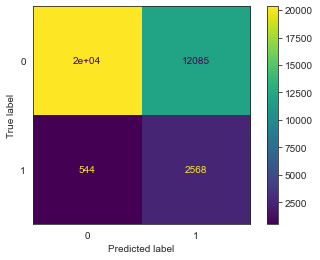

In [93]:
#Confusion matrix
cm1 = confusion_matrix(y_test, y_pred_f, labels=decision_tree_f.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=decision_tree_f.classes_)
disp1.plot()

From the f-value and confucsion matrix, we can see that prediction result is not as we expected. Specifically, from the confusion matrix above, we can see that there are lots of false postives and false negatives. And from the test score above, its accuracy is even below 0.9, which is our baseline because 90% of our dataset is labeled as 0; so even if we do nothing, we have 90% accuracy. Therefore, we can conclude that when we maximize the f-value, its accuracy will drop significantly.

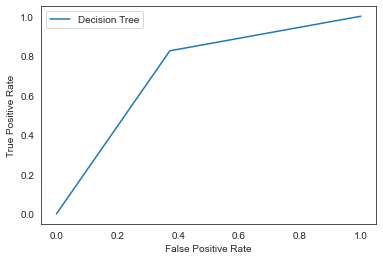

Logistic: ROC AUC=0.726


In [94]:
# auc, roc curve
dt1_auc_score = roc_auc_score(y_test, y_pred_f)
dt1_fpr, dt1_tpr, _ = roc_curve(y_test, y_pred_f)

plt.plot(dt1_fpr, dt1_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('Logistic: ROC AUC=%.3f' % (dt1_auc_score))

From the plot above, we can see that the AUC is not very high, only about 0.72. This means that our decision tree model cannot accuractely predict the results. Our expection is about 0.9.

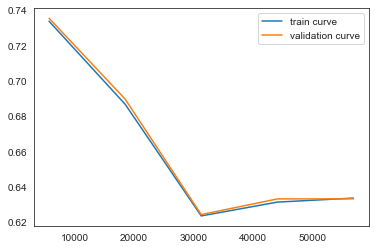

In [98]:
# Learning curve
train_sizes1, train_scores1, test_scores1, fit_times, _ = learning_curve(decision_tree_f, X_train, y_train, cv=skf,return_times=True, n_jobs = -1)
plt.plot(train_sizes1,np.mean(train_scores1,axis=1),label = "train curve")
plt.plot(train_sizes1,np.mean(test_scores1,axis=1),label = "validation curve")
plt.legend()

From the learning curve here, we can see that there are not much difference between the training curve and the validation curve. This means that the performance is relatively stable. Also, as we train on more examples,the accuracy actually decreases. Hence, this also indicates that the decision tree model may not be very appropriate for this dataset due to its inbalanced ratio.

In [99]:
#decision tree based on accuracy
decision_tree_a = DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)
decision_tree_a.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)

In [100]:
# test result
train_score_a = decision_tree_a.score(X_train, y_train)
test_score_a = decision_tree_a.score(X_test,y_test)

y_pred_a = decision_tree_a.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred_a,))
print("Train_score:", train_score_a)
print("Test_score", test_score_a)

F1 score: 0.0
Train_score: 0.9139660873847886
Test_score 0.9124194410829369


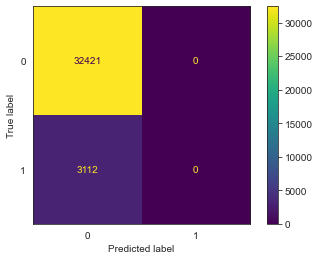

In [101]:
#Confusion matrix
cm2 = confusion_matrix(y_test, y_pred_a, labels=decision_tree_f.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=decision_tree_a.classes_)
disp1.plot()

From the matrix above, we can see that there exist some problems with the decision tree if we prioritize on accuracy. To be specific, the decision tree simply classified every datapoint as negative label. In this way, the accruacy of the model will achieve 90%. Even though we have tried to adjust the weight of the rare class, but that does not have much effect on the overall classification.One possible reason is that the ratio between postive and negative class is so big, and weight adjustments may not work.

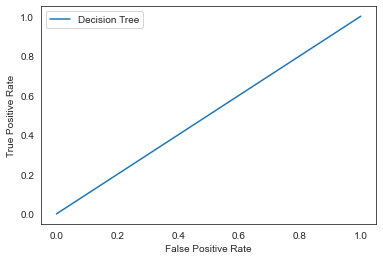

Logistic: ROC AUC=0.500


In [102]:
# auc roc curve
dt2_auc_score = roc_auc_score(y_test, y_pred_a)
dt2_fpr, dt2_tpr, _ = roc_curve(y_test, y_pred_a)

plt.plot(dt2_fpr, dt2_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('Logistic: ROC AUC=%.3f' % (dt2_auc_score))

Compared with the decision tree based on f-value, we can see that this model is even worse. The AUC(area under curve) is simply 0.5, just like we are taking random guess. 

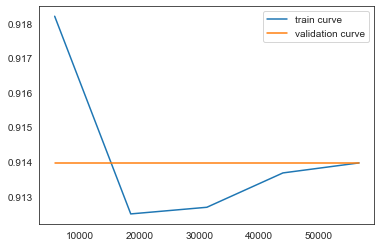

In [103]:
# Learning curve
train_sizes2, train_scores2, test_scores2, fit_times, _ = learning_curve(decision_tree_a, X_train, y_train, cv=skf,return_times=True, n_jobs = -1)
plt.plot(train_sizes2,np.mean(train_scores2,axis=1),label = "train curve")
plt.plot(train_sizes2,np.mean(test_scores2,axis=1),label = "validation curve")
plt.legend()

From the learning curve presented above, we can see that as the training goes, the validation curve did not change. This is because the model simply classify everything as negative. Hence, after viewing all these results and metrics, we can draw the conclusion that decision tree is not very appropriate. Even though we prioritize on both f-value or accuracy for the decision tree model, their results are below our expectation.

### Decision Tree Summary

- Decision tree is not very suitable for this dataset. The main reason is that the dataset is quite imbalanced: about 90% of the samples are marked as 0 while 10% are marked as 1. And to deal with the imbalanced dataset, we actually try many approches. First of all, we adjust the weight of the rare class, so misclassifying the rare class will have the higher cost. Second, we use Stratified Kfold to make sure that each split contains the same proportion amount of positive and negative class. After trying all these approches, the results are still not very good. Therefore, we conclude that the decision tree algorithm is not very suitble for this dataset


- We perform the feature selection on the raw data. We firstly compute the Pearson Coefficient for each feature, determining the strength of its correlation. And we found that the "race" feature is the least related. Therefore, we decide to drop those columns. This reduces our number of features from 29 to 24.


- For decision tree model, we firstly use a default decision tree without any parameters. Its accruacy is around 86% and its f-value is about 0.246. So the accuracy is not very high and f-score is relatively low. This is mainly because the dataset is quite imbalanced. And we will add some parameters to handle such situation.

- We build learning curves for the two decision tree models above: one model is based on f-1 value, while the other one is based on accuracy. From the learning curve, we can see that for the model based on f-value, its traninig curve and validation curve are basically the same, so its performance is relatively stable. However, its accuracy is quite low. For the model based on accuracy, its validation curve did not change, which may suggest that there may not lot of training there. From the two learning curves here, we can conclude that the decision tree model is not very suitable for the dataset.

### SVM

#### Packages

In [ ]:
from cuml import SVC

In [31]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

#### Data Types

In [32]:
split_data[2].dtypes

BMI                     float64
PhysicalHealth          float64
MentalHealth            float64
AgeCategory             float64
SleepTime               float64
HeartDisease              int64
Smoking                   int64
AlcoholDrinking           int64
Stroke                    int64
DiffWalking               int64
PhysicalActivity          int64
Asthma                    int64
KidneyDisease             int64
SkinCancer                int64
Female                  float64
Male                    float64
Other                   float64
Diabetic(No)            float64
Diabetic(Yes)           float64
GenHealth(Excellent)    float64
GenHealth(Fair)         float64
GenHealth(Good)         float64
GenHealth(Poor)         float64
GenHealth(Very good)    float64
dtype: object

#### Data Splits

In [40]:
svm_df = split_data[2]
X_train, X_test, y_train, y_test = train_test_split(svm_df.drop(columns = "HeartDisease"), svm_df["HeartDisease"].astype(int), test_size=0.2, random_state=42)

Spliting the data into train and test, as well as X and y.

#### PCA

In [41]:
pca = PCA()
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We first create a PCA on the training set of X, then use the same PCA to transform the test set of X. After that, we did a normolization on the dataset for both training and testing set of X. Because the Y data are compose with 0 and 1, we do not need to change that.

#### Grid Search Parameters

In [49]:
space = {'C': [1, 3, 9],
         'kernel': ['rbf', 'poly', 'linear'], 
         'class_weight': [{0:1.0, 1:3.0}, {0:1.0, 1:5.0}, {0:1.0, 1:7.0}],}
svm = SVC(cache_size = 4096)

Because we have around 10,000 data with 24 features, the time need for SVM will be extremely long. We use GPU acceleration for the SVM as well as tested different parameters for the model, the above will show the difference between each variables when doing the grid search.

Within the test, the gamma value does not influence a lot for the SVM but rather the most important variables is the class_weight, because our dataset has a inbalance ratio such that 90% of the data does not have Heart Disease (HeartDiease=0).

#### Grid Search

In [50]:
grid = GridSearchCV(svm, space, scoring="f1", verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=rbf;, score=0.349 total time=   9.7s
[CV 2/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=rbf;, score=0.346 total time=   8.5s
[CV 3/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=rbf;, score=0.333 total time=   8.7s
[CV 4/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=rbf;, score=0.314 total time=   8.8s
[CV 5/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=rbf;, score=0.337 total time=   8.7s
[CV 1/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=poly;, score=0.349 total time=   8.5s
[CV 2/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=poly;, score=0.346 total time=   8.5s
[CV 3/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=poly;, score=0.333 total time=   8.7s
[CV 4/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=poly;, score=0.314 total time=   9.0s
[CV 5/5] END C=1, class_weight={0: 1.0, 1: 3.0}, kernel=poly;, score=0.337 total time=   8.8s
[CV

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 3, 9],
                         'class_weight': [{0: 1.0, 1: 3.0}, {0: 1.0, 1: 5.0},
                                          {0: 1.0, 1: 7.0}],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='f1', verbose=3)

Use f1 score so that the it is a better metric compare to accuracy score since 90% of our data are marked with NO Heart Disease which will be zero for the y value.

In [51]:
grid.best_params_

{'C': 1, 'class_weight': {0: 1.0, 1: 5.0}, 'kernel': 'rbf'}

In [52]:
grid.best_score_

0.36670747113800095

Show the best parameter and score result from the grid search

#### SVM Result

In [53]:
svm = SVC(C=1, class_weight={0:1, 1:5}, cache_size=4096)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     19470
           1       0.28      0.23      0.25      1850

    accuracy                           0.88     21320
   macro avg       0.60      0.59      0.59     21320
weighted avg       0.87      0.88      0.88     21320



In [61]:
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
print("Train_score:", train_score)
print("Test_score", test_score)

Train_score: 0.9132719039916992
Test_score 0.9126172661781311


Use the best parameter above to regenerate the model using the full dataset, also print our the scoring on the y_test data.

In [56]:
svm = SVC(C=1, class_weight={0:1, 1:5}, gamma='scale', cache_size=4096, probability=True)
svm.fit(X_train, y_train)
y_prob = svm.predict_proba(X_test)
y_prob = y_prob[:,1]

Regenerate the model with probability prediction on

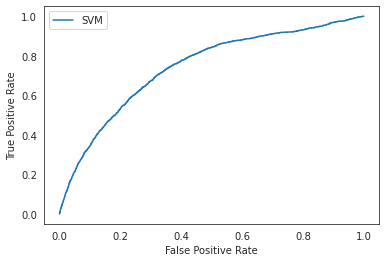

SVM: ROC AUC=0.741


In [58]:
svm_auc_score = roc_auc_score(y_test, y_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_prob)
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('SVM: ROC AUC=%.3f' % (svm_auc_score))

ROC graph of the SVM

#### Learning Curve

In [42]:
from sklearn.svm import SVC as svc

In [43]:
X_train = X_train[:40000]
y_train = y_train[:40000]

In [44]:
%%time
clf = svc(C=1, class_weight={0:1, 1:5}, gamma="scale", probability=True)
clf.fit(X_train, y_train)

CPU times: user 7min 18s, sys: 3.02 s, total: 7min 21s
Wall time: 7min 22s


SVC(C=1, class_weight={0: 1, 1: 5}, probability=True)

/Users/cody/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


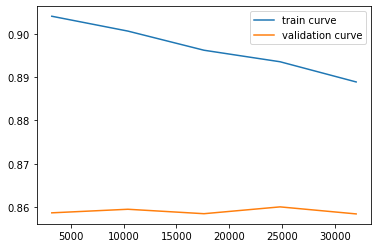

In [45]:
size, train_score, test_score, time, _ = learning_curve(clf, X_train, y_train, return_times=True, n_jobs = -1)
plt.plot(size,np.mean(train_score,axis=1),label = "train curve")
plt.plot(size,np.mean(test_score,axis=1),label = "validation curve")
plt.legend()

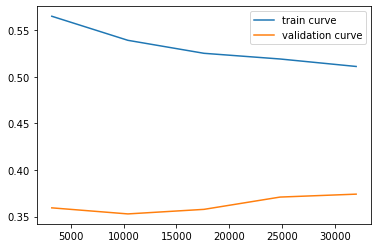

In [46]:
size, train_score, test_score, time, _ = learning_curve(clf, X_train, y_train, return_times=True, n_jobs = -1, scoring="f1")
plt.plot(size,np.mean(train_score,axis=1),label = "train curve")
plt.plot(size,np.mean(test_score,axis=1),label = "validation curve")
plt.legend()

### SVM Explained

The time for normal SVM in sklearn take so much time - around 30 minutes for 10,000 row - not even considering our 24 features. So we decided to use the GPU acceleration on the SVM, and CMUL is the package we pick.

We only have 1 person with 1 3080 GPU and if we use cv=5 for 1,000 combinations, it literally tooks from morning to midnight. As you can see form the demo, it tooks about 1-2 hours to just run "Fitting 5 folds for each of 27 candidates, totalling 135 fits", then 1,000 fits will rake around 15 hours. consider this much work we decided to do only show a section of our work.

So the above is the best section of our grid search hyperparameter selection.

We spend at least 100 hours on running the gridsearch on the given data set with the following parameters:
- C: 0.001, 0.01, 0.1, 1, 10, 100, 1000
- Gamma: "auto", "scale", 1, 0.1, 0.01, 0.001, 0.0001
- Model: "rbf"(default), "poly", "linear", "sigmoid"
- Class Weight: {100:1}, {10:1}, {1:1}, {1:2}, {1:3}, {1:4}, {1:5}, {1:6}, {1:7}, {1:10}, {1:100} (the ratio is the ration of class_0 : class_1 - no : yes)
- PCA: 3, 5, 10, 20 (decrease data demension)

The process above on grid search gives us the following result:
- C: if C is lower than 1, the model basically gives up on the YES-HEART-DISEASE case and accuracy scoure is around 0.91 with f1 score equals to 0. Also any C value larger than 10 will result in f1 score lower than 0.2. Thus we choose 1, 3, and 9 for our search space.
- Gamma: really does not matter in this case, and anything not "auto" make the model calculation time larger (about 50% more time), but with about 0.001 f1 score improvement. thus the gamma is ignored at the grid search.
- Model: from the demo above we can see that it also does not matters a lot, but sigmoid model usually only gives 50% of what other model get (if rbf has score=0.25, the sigmoid will have socre=0.13). Also, polynomial model does not work that well when C value is small or sigma value is not "auto". Thus, the Sigmoid is dropped our of the search space.
- Class Weight: after run all the above parameters, from {1:1} to {1:10} the f1 score starts from 0.15 raise to about 0.35 ({1:5} ratio) and get back down to 0.2, thus we choose {0:1.0, 1:3.0}, {0:1.0, 1:5.0}, {0:1.0, 1:7.0} for our search space.
- PCA: We tried to PCA down some features so that SVM can actually working better with less noise, but it turns our useless, the less the features the worse the score, thus we give up on reducing the demension for the data. But the PCA it self (keep same number of features) does improve the f1 score by around 10% so we kept that.

If we trained on accuracy, then the SVM gives pretty good and fast response simply by predicting all the patient does not have heart diease.

### Analysis and Conclusion

- SVM does not give very good result for this dataset. The main reason is that the dataset is very imbalanced: about 90% of the samples are marked as 0 while 10% are marked as 1. PCA is added to the train and test set try to reduce the noise as wella as the class weight is added to the space to ease out the effects of the inbalanced dataset. But the results shows that the syptom of inbalanced data.

- Feature selection has done previously and has been discussed in the decision tree section.

- The accuracy score from all of the above parameters are very stable, all around 0.91, which never changed. As we can see in the demo, both the training and testing score is 0.91. Thus we bleive that improving the f1 score on class 1 (have heart disease) is our primal goal, and our best model gives the f1 score for our best model when testing is 0.25, which is not a good score. Still, this may caused by the very imbalanced dataset.

- From the ROC curve, we can see that the curve does not show a good patter between TPR and FPR, and the AUC is 0.741, which there still 1/4 of the area need to be obtained to reach the perfect graph for ROC. And becuse if we trained on accuracy, the SVM will give simple result whihc predict all y values are 0 - no heart disease for everyone, which will still gives them a 0.91 high score no matter what parameter we input. Thus for SVM we cannot graph a learning curve.

- All in all, the dataset is quiet unbalanced, and the f1 score result has prove that SVM cannot handel this dataset or gives out good predictions.

## Logistic Regression

### Import Packages

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

### Split data

In [58]:
result_df = result_df.drop(['Asian','Black','Hispanic','Other','White'], axis = 1)
split_data = []
for i in range(3):
    split_data.append(result_df.sample(result_df.shape[0]//3, replace = False, random_state = 42))

In [59]:
X = split_data[0]
X = X.drop(['HeartDisease'], axis=1)
y = split_data[0]
y = y["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### First train with default parameters

Firstly, we train the logistic regression model with default parameters of L2 penalty term and C value (inverse of regularization strength) of 1, and random state of 0. Then we fit the model using training data.

In [60]:
clf = LogisticRegression(penalty='l2', C=1.0, random_state=0)
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

### Take a look at the result

In [61]:
print(score_test)

0.9133833646028768


The mean accuracy of 0.91 shows average performance on predicting the labels of test data of the logistic regression model.

In [62]:
y_pred_test = clf.predict(X_test)
class_report_test = classification_report(y_test, y_pred_test)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32090
           1       0.53      0.10      0.17      3088

    accuracy                           0.91     35178
   macro avg       0.73      0.55      0.56     35178
weighted avg       0.89      0.91      0.89     35178



After we predict the labels of the test data, we check the report of the model's performance on some metrics. The precision, recall, and f1-score of predicting the "0" label, which are healthy people, are much higher than predicting the "1" label, which are heart disease patients, because there are significantly more healthy people than heart disease patients in the dataset. As a result, the model is much better at predicting the healthy people than heart disease patients.

Area under the Receiver Operating Characteristic curve: 0.8369688977890875


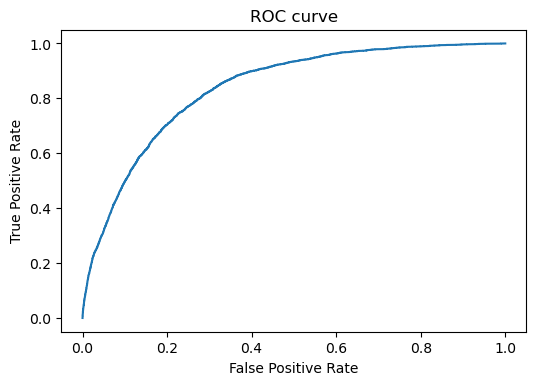

In [63]:
scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores, pos_label=1)
roc_auc = roc_auc_score(y_test, scores)
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

We then compute the probability estimate for each class in the model, and calculate the true positive rate, false positive rate, and thresholds using the probability estimate for the positive class. Next, we plot the receiver operating characteristic curve, and compute the area under the ROC curve. We can see that the curve is close to a diagonal line from the bottom left to the top right corners, which means that the logistic regression model has an average performance on the dataset. The area under the curve is not very high either. <br><br>
Therefore, we decide to perform k-fold cross validation for further analysis.

### Apply KFold to check the result

In [64]:
kf = KFold(n_splits=10, shuffle=True)
model = LogisticRegression(penalty='l2', C=1.0, random_state=0)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf)
scores

array([0.91809017, 0.91598992, 0.9133296 , 0.90604873, 0.9108093 ,
       0.91669   , 0.91781014, 0.91851022, 0.91192943, 0.91865024])

We perform a 10-fold cross validation and evaluate its accuracy score. The scores of all folds have an average at about 0.91, which is not very high, so we perform grid search to find the best parameters.

### The result doesn't look good, apply GridSearch to find the parameters

In [43]:
model = LogisticRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.75, 0.1, 0.2, 0.25, 0.5, 1]
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\shli_\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91472417 0.91472977        nan 0.91472697 0.91472697        nan
        nan 0.91483898        nan 0.91488939 0.91485858 0.91485858
 0.91453654 0.91485858 0.91485858        nan        nan        nan
        nan        nan 0.91472417 0.91472977        nan 0.91472977
 0.91473257        nan        nan 0.91488379        nan 0.91495379
 0.91492019 0.91492299 0.91470176 0.91492299 0.91492299        nan
        nan        nan        nan        nan 0.91472417 0.91472977
        nan 0.91472977 0.91472417        nan        nan 0.91505181
        nan 0.91505741 0.91486418 0.91486138 0.91474097 0.91486418
 0.91486418        nan        nan        nan        nan        nan
 0.91472417 0.91472977        nan 0.91472697 0.91473537        nan
        nan 0.915007          nan 0.9150378  0.91485298 0.91485578
 0.91474657 0.91485298 0.91485298        nan        n

Best Score: 0.9150574068888265
Best Hyperparameters: {'C': 0.03, 'penalty': 'l1', 'solver': 'saga'}


In [45]:
clf_best = LogisticRegression(penalty='l1', C=0.03, solver='saga', random_state=0)
clf_best.fit(X_train, y_train)
score_best = clf_best.score(X_test, y_test)
print(score_best)

0.9136676331798284


After we ran grid search on different parameters of solvers, penalty terms, and C values, we found that the best model with C value of 0.03, l1 penalty term, and saga solver has the best accuracy score of 0.915 when trained on the training data. Finally, we ran the model using the best parameters we found on the test data, and found a accuracy score of 0.9137, which is slightly higher than the score of 0.9134 of the model with default parameters.

### Conclusion

After performing k-fold cross validation and gird search to find the best parameters, the model does not show a significant improvement in its accuracy score. Therefore, logistic regression might not be a suitable model for predicting heart disease patients in this dataset.

# Ethics & Privacy

The dataset on Kaggle does not have major ethical, privacy, or terms of use issues. The data of heart disease is collected from the Behavioral Risk Factor Surveillance System, which is a telephone survey system that collects people’s health data. It is part of the Centers for Disease Control and Prevention, which is a government agency, so there might not be much ethical concern or biases about how health data is collected. Since the dataset does not include personally identifiable information, it probably has few privacy issues.

In order to protect our dataset from ethical and privacy issues, we will compare data from different sources to verify the data is free of biases and ethical concerns


# Team Expectations 

* *1) We are expected to attend weekly meeting and be prepared for meeting.*
* *2) Everyone is expected to contribute evenly to this project.*
* *3) Everyone's idea will be respected by others.*
* *4) Finish one's work one day before deadline so that others could proofread everything.*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/17  |  10 PM |  Brainstorm topics/datasets (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research; draft project proposal; Edit, finalize and submit proposal | 
| 4/24  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; Discuss possible models to implement | 
| 5/1  | 10 AM  | Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 5/8  | 6 PM  | Import & Wrangle Data ,do some EDA (all) | Review/Edit wrangling/EDA; Discuss Analysis Plan; Finish checkpoint   |
| 5/15  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (all) | Discuss/edit project code; Complete project |
| 5/22  | 12 PM  | Keep programming for projects and add analysis | Discuss/edit full project |
| 5/29  | 8 PM  | Finalize analysis; Draft results/conclusion/discussion (all) | Finalize full project  |
| 6/8  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="CDC"></a>1.[^](#admonish): CDC Heart Disease Facts.https://www.cdc.gov/heartdisease/facts.htm<br>
<a name="BMC"></a>2.[^](#admonish): BMC Medical Informatics and Decision Makinghttps://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5<br>
<a name="Hindawi"></a>3.[^](#admonish): Prediction of Heart Disease Using a Combination of Machine Learning and Deep Learning https://www.hindawi.com/journals/cin/2021/8387680/<br>
